In [81]:
#read vaccination progress csv file into python
#load required packages
# tweets with a link at the end have been cut off
import re
import seaborn as sns

In [82]:
#import twitter dataset directly into pandas data frame
import pandas as pd

url = 'https://github.com/AlexHumfrey/Python_Coursework/raw/main/vaccination_all_tweets.csv'
twit_vac_data = pd.read_csv(url)   
#twit_vac_data.head()

In [83]:
#exploratory analysis of datset
print(type(twit_vac_data))
print('Dataset size:',twit_vac_data.shape)
print('Columns are:',twit_vac_data.columns)
print('DataFrame Info: ',twit_vac_data.info())

<class 'pandas.core.frame.DataFrame'>
Dataset size: (56585, 16)
Columns are: Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                56585 non-null  int64 
 1   user_name         56585 non-null  object
 2   user_location     43499 non-null  object
 3   user_description  52698 non-null  object
 4   user_created      56585 non-null  object
 5   user_followers    56585 non-null  int64 
 6   user_friends      56585 non-null  int64 
 7   user_favourites   56585 non-null  int64 
 8   user_verified     56585 non-null  bool  
 9   date              56585 non-null 

In [84]:
#list of variables
list(twit_vac_data)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [85]:
#print(twit_vac_data.head())
#print(twit_vac_data.tail())
#random sample of 5 rows from dataframe
print(twit_vac_data.sample(n=5, random_state = 1))
# select rows and columns to view
#print(twit_vac_data.iloc[10:20,10:14])

                        id                  user_name  \
45064  1379124926427324416              ocean cryptid   
2951   1349417388576546816                     TheRag   
44002  1377879796722507777             Shen Shiwei沈诗伟   
18733  1366421056349564928  le changement est certain   
51368  1381231313202597892              Anthony Field   

                        user_location  \
45064                             NaN   
2951   Ragbag Of Reviews And Insights   
44002                 Beijing, China    
18733           Warangal,Telangana      
51368                Radlett, England   

                                                                                          user_description  \
45064                                               bold of you to assume you’ve perceived me BLM She/they   
2951                                                              siya@mmvii.co.za/heelextension@gmail.com   
44002  Report BRI,Africa,CPEC; Africa fellow in Univ; Years in Africa; Charhar I

In [ ]:
#add more exploratory analysis of dataset





In [86]:
#preprocessing twitter data/cleaning text

twit_vac = twit_vac_data

#Remove twitter handlers
twit_vac.text = twit_vac.text.apply(lambda x:re.sub('@[^\s]+','',x))
#remove hashtags
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove URLS
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r"http\S+", "", x))
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r"https\S+", "", x))
# Remove all the special characters
twit_vac.text = twit_vac.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))
#remove all single characters
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Substituting multiple spaces with single space
twit_vac.text = twit_vac.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# increase columnwidth to show full tweet
#pd.options.display.max_colwidth = 280


In [87]:
# display sample of preprocessed dataset
twit_vac.text.head(30)
#twit_vac.text.sample(n=5)

0                                                  Same folks said daikon paste could treatcytokine storm
1     While the world has been on the wrong side of history this year hopefully the biggest vaccinatio...
2                                                            Russian vaccine is created to last 2 4 years
3     Facts are immutable Senator even when you re not ethically sturdy enough to acknowledge them 1 Y...
4                                                                  Explain to me again why we needvaccine
5     Does anyone have any useful advice guidance for whether the COVID vaccine is safe whilst breastf...
6        it isbit sad to claim the fame for success of on patriotic competition between USA Canada UK and
7                    There have not been many bright days in 2020 but here are some of the best 1 winning
8                                                                            Covid vaccine You getting it
9                                             

In [88]:
#worldcloud vizualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

#The problem is that the WordCloud.generate method that you are using
#expects a string on which it will count the word instances but you provide a pd.Series.
#which would concatenate all words in your dataframe column and then count all instances.

tweet_All = ' '.join(twit_vac['text'])

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 40))
    # Display image
    plt.imshow(wordcloud, interpolation ='bilinear') 
    
    # No axis details
    plt.axis("off");
    


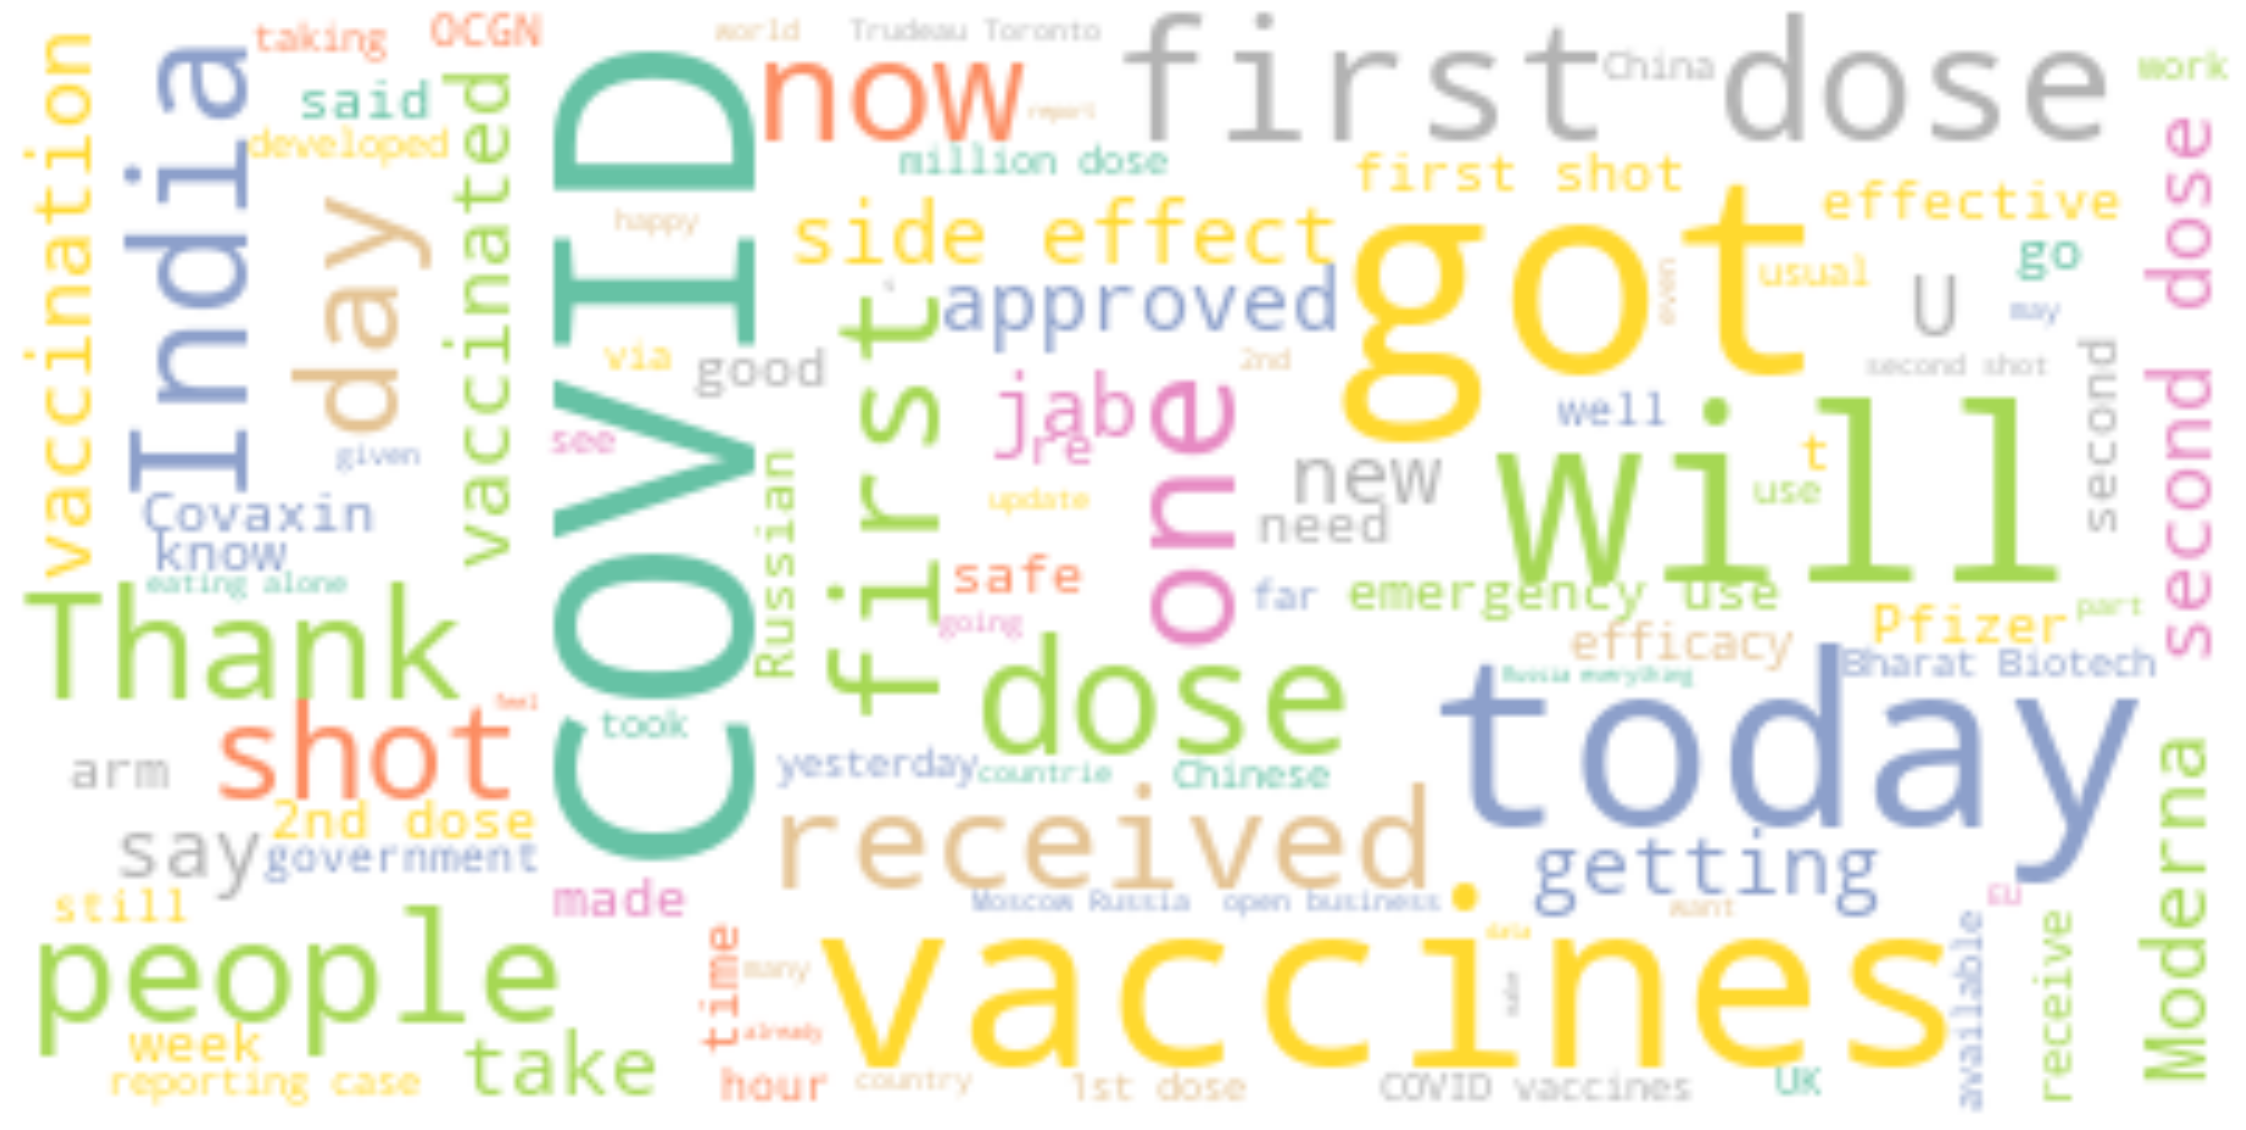

In [89]:
#display wordcloud of entire dataset, explain what the wordcloud is showing (needs formatting)
#add custom stop words 
STOPWORDS.update(['done', 'amp'])
#print(STOPWORDS)

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color='white', colormap='Set2', random_state = 2, stopwords = STOPWORDS).generate(tweet_All)

# Plot
plot_cloud(wordcloud)

In [90]:
#Sentiment Analysis of Twitter Data

# import relevant data/text wrangling packages for SA
import nltk
#nltk.download()
from textblob import TextBlob

#sentiment analysis using textblob (explain how it works)
twit_vac['polarity'] = twit_vac['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
twit_vac['subjectivity'] = twit_vac['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
twit_vac.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' ...",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treatcytokine storm,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all th...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of history this year hopefully the biggest vaccinatio...,NaN,Twitter Web App,1,1,False,-0.50,0.900000
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,Russian vaccine is created to last 2 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,0.00,0.033333
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,Facts are immutable Senator even when you re not ethically sturdy enough to acknowledge them 1 Y...,NaN,Twitter Web App,446,2129,False,-0.05,0.550000
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we needvaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00,0.000000


In [91]:
#to use Grouper needed date variable in datetime format

#twit_vac.dtypes
twit_vac['date'] = pd.to_datetime(twit_vac['date'])

Neutral     41117
Positive    13159
Negative     2309
Name: polarity, dtype: int64


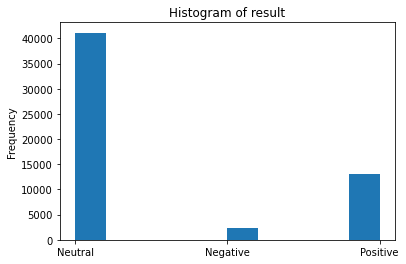

In [104]:
#frequency of positive, negative and neutral tweets

import warnings
warnings.filterwarnings("ignore")

sentiment_results =  twit_vac[['date','text','polarity']]

sentiment_results['polarity'][sentiment_results['polarity'] <= -0.25] = -1
sentiment_results['polarity'][sentiment_results['polarity'] >= 0.25] = 1
sentiment_results['polarity'][(sentiment_results['polarity'] < 0.25) & (sentiment_results['polarity'] > -0.25)] = 0

polarity = sentiment_results['polarity'].astype('str')
polarity = polarity.str.replace('-1.0','Negative')
polarity = polarity.str.replace('1.0','Positive')
polarity = polarity.str.replace('0.0','Neutral')
counts = polarity.value_counts()
print(counts)


fig,ax = plt.subplots(1,1)


ax.hist(polarity)
ax.set_title("Histogram of result")


ax.set_ylabel('Frequency')
plt.show()

warnings.resetwarnings()
#%%
#fig = plt.figure(figsize=(15,4))
#ax = plt.gca()
#ax.set_title("Histogram of result")


#ax.set_ylabel('Frequency')
#counts, _, patches = ax.hist(polarity)
#for count, patch in zip(counts,patches):
#    ax.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
#plt.show()


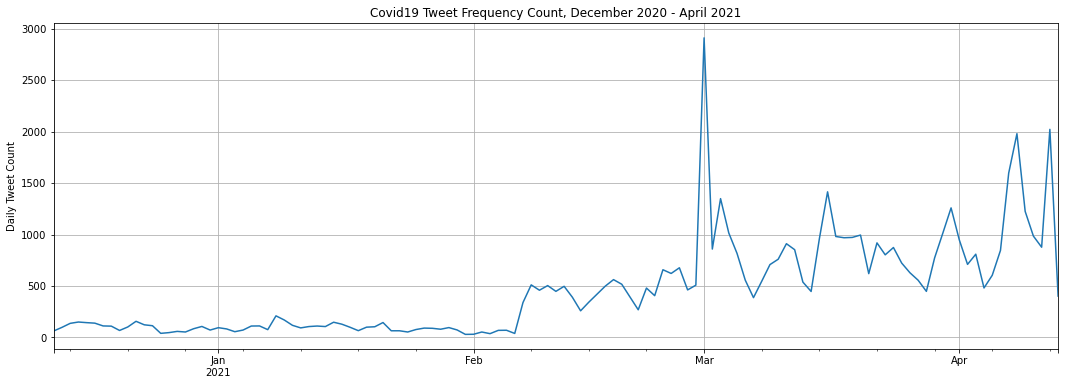

In [59]:
# sentiment analysis results/plots

#tweet frequency by date...

tweet_per_day = twit_vac.groupby(pd.Grouper(key='date', freq='D', convention = 'start')).size()

tweet_per_day.plot(figsize = (18,6))
plt.ylabel('Daily Tweet Count')
plt.title('Covid19 Tweet Frequency Count, December 2020 - April 2021')
plt.xlabel('')
plt.grid(True)



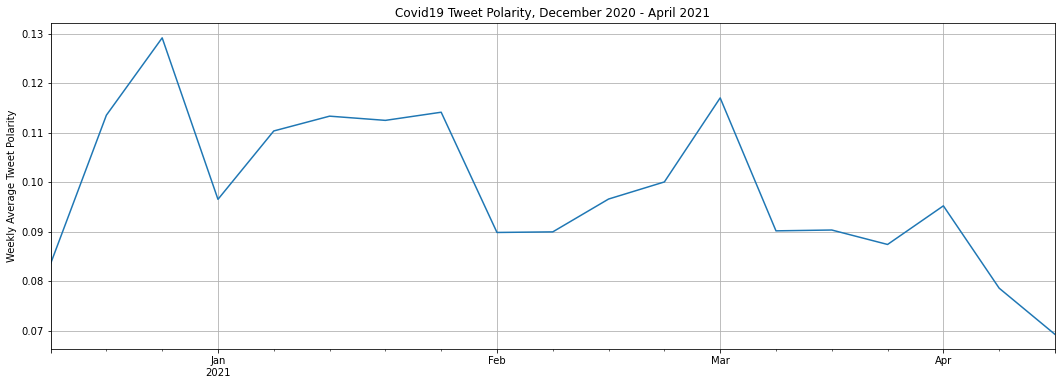

In [57]:
#polarity by date, assuming the majority are neutral higher peaks here suggest generally positive tweets
#looks like tweets are getting less positiv as the rollout continues
#used weekly as not many tweets initially in the dataset, give less noisy chart

import numpy

tweet_per_day = twit_vac.groupby(pd.Grouper(key='date', freq='W', convention = 'start')).mean()

tweet_per_day['polarity'].plot(figsize = (18,6))
plt.ylabel('Weekly Average Tweet Polarity')
plt.title('Covid19 Tweet Polarity, December 2020 - April 2021')
plt.xlabel('')
plt.grid(True)


In [76]:
# show most negative tweets in april

mar_apr_tweets = twit_vac[(twit_vac['date']> '2021-03-01') & (twit_vac['polarity']<-0.5)]

neg_tweets = mar_apr_tweets.nsmallest(10,['polarity'])

pd.options.display.max_colwidth = 100
neg_tweets['text']


16650        a patient who has beaten the gt The worst thing was seeing the people around me diesawlot of pe
16973    my side effects sucked but GET VACCINATED GET VACCINATED one day of being miserable is nothing c...
20555                                                          Shocking of COVAXIN Signs of recipients taken
20556                                                                                Shocking of COVAXIN Sig
21451              What joined them so we could sort them out Or prevent the nasty from stopping life saving
22396                                                                                          Do your worst
22555                                         Very shocking that Telangana Govt not making purchase of Is it
23185    Vaccine side effects hack takeBenadryl immediately after getting your shotve heardlot of nasty s...
23536            Day 4shot 1 ughm miserable but ironicallyhave never had any injection site pain or swelling
23855              

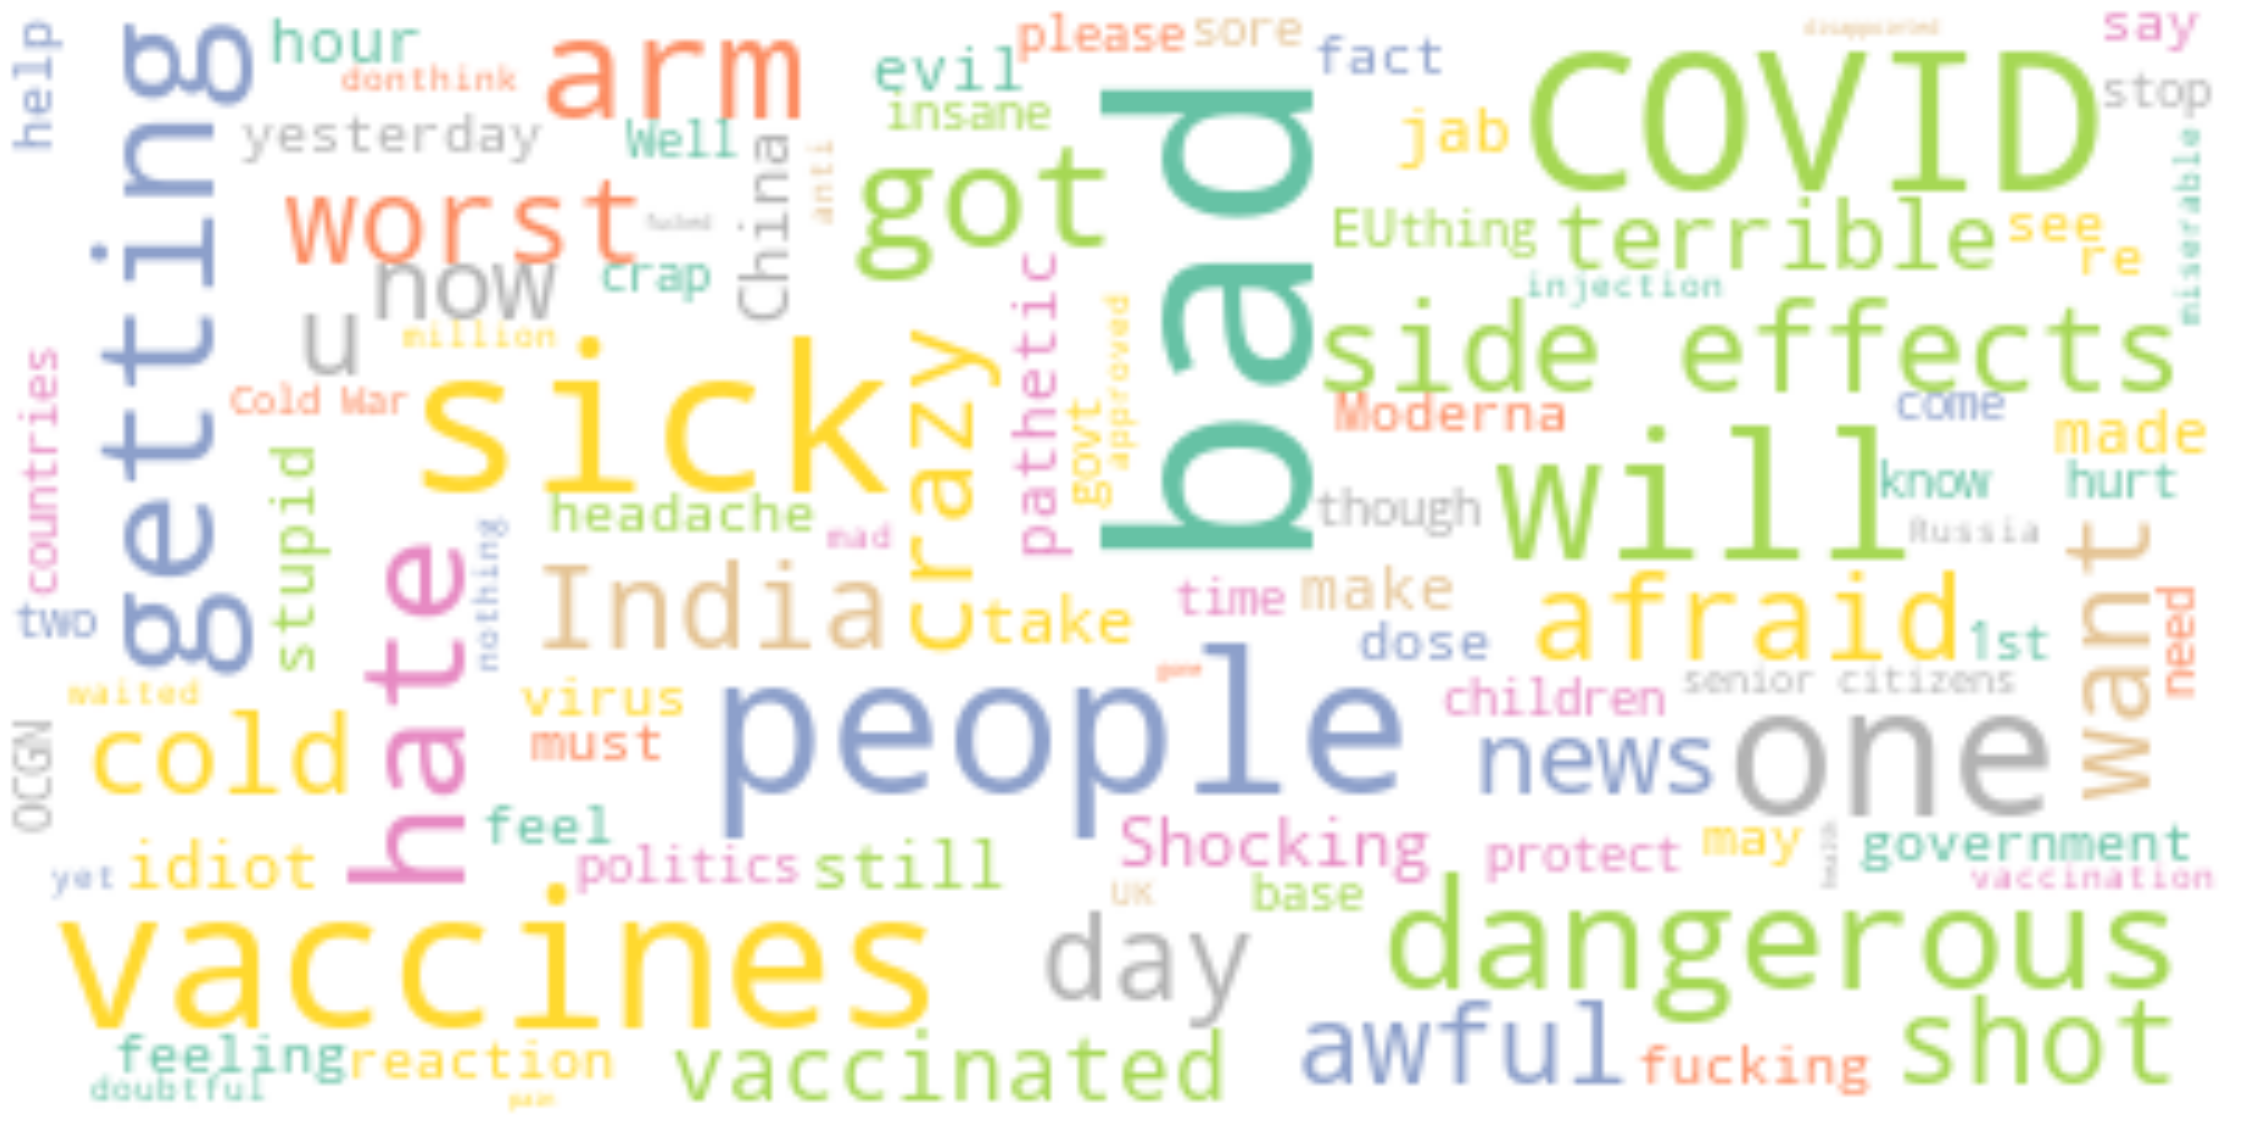

In [77]:
# MArch/April wordcloud

tweet_marapr = ' '.join(mar_apr_tweets['text'])

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 40))
    # Display image
    plt.imshow(wordcloud, interpolation ='bilinear') 
    
    # No axis details
    plt.axis("off");
    
#display wordcloud of march april negative tweets,
#add custom stop words 
STOPWORDS.update(['done', 'amp','vaccine','Ontario','Canada','Doug','Ford'])
#print(STOPWORDS)

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color='white', colormap='Set2', random_state = 2, stopwords = STOPWORDS).generate(tweet_marapr)

# Plot
plot_cloud(wordcloud)